In [1]:
import pathlib
import tensorflow as tf

# Define the path for train and test images
data_dir_train = pathlib.Path(r"C:\Users\debli\Downloads\Upgrad\04_Course_Deep_Learning\Melanoma Detection Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"C:\Users\debli\Downloads\Upgrad\04_Course_Deep_Learning\Melanoma Detection Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

# Count the number of images in train and test directories
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f"Number of training images: {image_count_train}")

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Number of test images: {image_count_test}")

# Parameters for image loading
batch_size = 32
img_height = 180
img_width = 180

# Create training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# List out all classes of skin cancer
class_names = train_ds.class_names
print(f"Classes: {class_names}")


Number of training images: 2239
Number of test images: 118
Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Classes: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


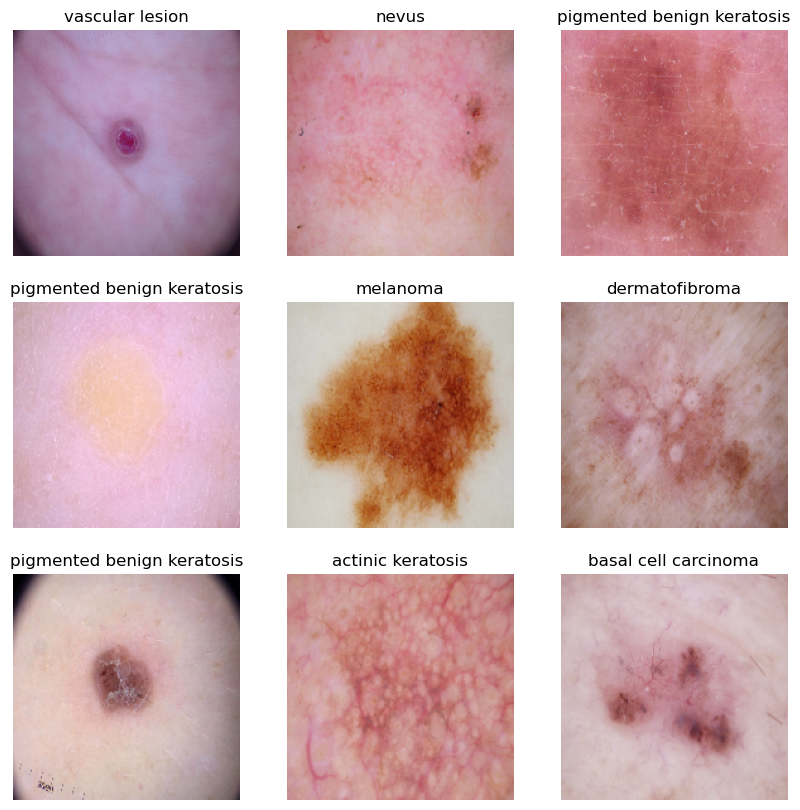

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [3]:
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation

AUTOTUNE = tf.data.experimental.AUTOTUNE

data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
  RandomRotation(0.1),
])

# Rescale pixel values
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


C:\Users\debli\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation

AUTOTUNE = tf.data.experimental.AUTOTUNE

data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
  RandomRotation(0.1),
])

# Rescale pixel values
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    data_augmentation,
    Rescaling(1./255),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # To handle overfitting
    layers.Dense(9, activation='softmax')
])


C:\Users\debli\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 410ms/step - accuracy: 0.1794 - loss: 2.3172 - val_accuracy: 0.2685 - val_loss: 1.9465
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 395ms/step - accuracy: 0.2538 - loss: 1.9840 - val_accuracy: 0.4004 - val_loss: 1.7762
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 394ms/step - accuracy: 0.3619 - loss: 1.7798 - val_accuracy: 0.4385 - val_loss: 1.6181
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 400ms/step - accuracy: 0.4129 - loss: 1.6743 - val_accuracy: 0.4676 - val_loss: 1.5715
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 421ms/step - accuracy: 0.4197 - loss: 1.6200 - val_accuracy: 0.4541 - val_loss: 1.6109
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 432ms/step - accuracy: 0.4415 - loss: 1.5885 - val_accuracy: 0.4855 - val_loss: 1.5570
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 434ms/step - accuracy: 0.4946 - loss: 1.5189 - val_accuracy: 0.5078 - val_loss: 1.4353
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 433ms/step - accuracy: 0.5012 - loss: 1.4488 - val_accu

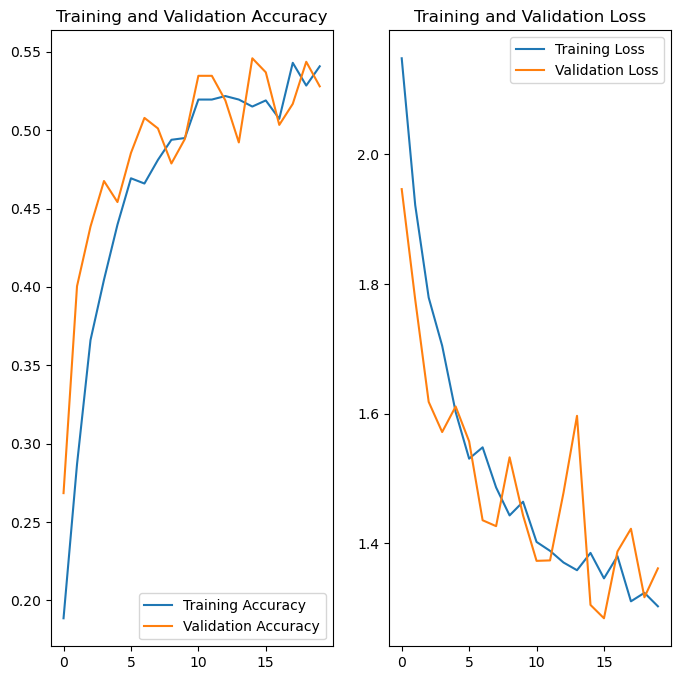

In [7]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

# Visualizing results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [8]:
import Augmentor
import os

path_to_training_dataset = r"C:\Users\debli\Downloads\Upgrad\04_Course_Deep_Learning\Melanoma Detection Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"

# Get a list of class directories
class_names = os.listdir(path_to_training_dataset)

for class_name in class_names:
    class_path = os.path.join(path_to_training_dataset, class_name)
    
    # Ensure output directory exists
    output_dir = os.path.join(class_path, "output")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Create Augmentor pipeline for the current class
    p = Augmentor.Pipeline(class_path)
    
    # Define augmentation operations
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    
    # Generate 500 augmented samples
    p.sample(500)


C:\Users\debli\anaconda3\Lib\site-packages\Augmentor\Pipeline.py:1086: SyntaxWarning: invalid escape sequence '\B'
  """


Initialised with 114 image(s) found.
Output directory set to C:\Users\debli\Downloads\Upgrad\04_Course_Deep_Learning\Melanoma Detection Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30D8B00>:   5%| | 25/500 [00:00<00:06, 69.02 Samples/s

Error writing 55ec9bcc-dd0c-4602-b9f0-eb0494a5ee23, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0026626.jpg_55ec9bcc-dd0c-4602-b9f0-eb0494a5ee23.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing efc6b70d-e98c-44b4-919a-b65bf4686bcd, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0027580.jpg_efc6b70d-e98c-44b4-919a-b65bf4686bcd.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30D8B00>:   5%| | 26/500 [00:00<00:03, 137.54 Samples/

Error writing af23610f-c1dd-4d94-a77d-f0486ad2acf5, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_af23610f-c1dd-4d94-a77d-f0486ad2acf5.jpg'. Change save_format to PNG?Error writing 4cc0a52f-e552-41c7-8f3b-d0a0bd975eec, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0033811.jpg_4cc0a52f-e552-41c7-8f3b-d0a0bd975eec.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.

You can chang

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3160080>:  12%| | 59/500 [00:00<00:0

Error writing be40c6ec-ffd7-4316-bcf4-5f184db9fe89, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0031108.jpg_be40c6ec-ffd7-4316-bcf4-5f184db9fe89.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 7d9610cc-42eb-4c76-986c-19051a33733e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0027802.jpg_7d9610cc-42eb-4c76-986c-19051a33733e.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D318D4F0>:  12%| | 61/500 [00:00<00:0

Error writing 69287fa9-eb8b-4748-80f3-e54f7590d34e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0028517.jpg_69287fa9-eb8b-4748-80f3-e54f7590d34e.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 9069a428-3ea7-44cd-8c82-3e3e008dabd0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0026729.jpg_9069a428-3ea7-44cd-8c82-3e3e008dabd0.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D31D5D00>:  22%|▏| 109/500 [00:00<00:

Error writing 5f1970d5-d1dd-454a-8251-d388422bd086, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0026625.jpg_5f1970d5-d1dd-454a-8251-d388422bd086.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 396491bb-aa52-41a8-a5ff-9340905957df, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0031922.jpg_396491bb-aa52-41a8-a5ff-9340905957df.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31D8E30>:  28%|▎| 140/500 [00:00<00:01, 210.25 Samples


You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 15615dbf-b22d-4aa6-b0c9-13788a439c8c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0026857.jpg_15615dbf-b22d-4aa6-b0c9-13788a439c8c.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 0b9622ad-905a-47a5-9038-e88571daea4b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collabor

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D31DB3B0>:  35%|▎| 176/500 [00:00<00:

Error writing 6284cc9f-0ef5-49e9-b550-49d071997795, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0029827.jpg_6284cc9f-0ef5-49e9-b550-49d071997795.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 9dc36850-8dcc-419d-913e-c5191c47565f, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0028517.jpg_9dc36850-8dcc-419d-913e-c5191c47565f.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3144B90>:  45%|▍| 227/500 [00:01<00:01, 189.69 Samples

Error writing b9d1967c-2b40-4f8f-b112-cee80ba4d650, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0026625.jpg_b9d1967c-2b40-4f8f-b112-cee80ba4d650.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 7f1fc548-4a2c-48de-ab16-6cfc5f27f6b4, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0029210.jpg_7f1fc548-4a2c-48de-ab16-6cfc5f27f6b4.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3145760>:  52%|▌| 260/500 [00:01<00:01, 208.25 Samples

Error writing 2eb90e22-9cb9-49c0-b494-300f48651aba, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0028190.jpg_2eb90e22-9cb9-49c0-b494-300f48651aba.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 5ef2e4fe-255f-489d-8cb7-ce6aa5a766ce, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0026040.jpg_5ef2e4fe-255f-489d-8cb7-ce6aa5a766ce.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D323C320>:  61%|▌| 304/500 [00:01<00:00, 217.82 Samples

Error writing 240254fe-f99e-4a8a-b0a6-68e0be654feb, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0028190.jpg_240254fe-f99e-4a8a-b0a6-68e0be654feb.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 8b1ca7ea-b4a6-481b-be32-f32849c3b17a, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0027580.jpg_8b1ca7ea-b4a6-481b-be32-f32849c3b17a.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30DAB10>:  68%|▋| 340/500 [00:01<00:00, 201.60 Samples

Error writing adeb0022-be85-45d7-9274-488879ba6b1b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0030344.jpg_adeb0022-be85-45d7-9274-488879ba6b1b.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 59d0ba1d-7fa8-4f87-8b66-adb4b61f6d5b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0026905.jpg_59d0ba1d-7fa8-4f87-8b66-adb4b61f6d5b.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D323D5E0>:  78%|▊| 388/500 [00:01<00:00, 222.59 Samples

Error writing d4978fa7-a240-407b-a3f5-324a11ab390e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0027452.jpg_d4978fa7-a240-407b-a3f5-324a11ab390e.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 98787786-3940-4e18-bdb5-9a33fc671a15, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0026468.jpg_98787786-3940-4e18-bdb5-9a33fc671a15.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3251AF0>:  86%|▊| 429/500 [00:02<00:00, 219.71 Samples

Error writing c22f4514-91d2-4afc-a4da-b9efa1766e52, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0030586.jpg_c22f4514-91d2-4afc-a4da-b9efa1766e52.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing cf7f2afa-ce12-4144-acab-a39a529e484c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0030143.jpg_cf7f2afa-ce12-4144-acab-a39a529e484c.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3268230>:  94%|▉| 468/500 [00:02<00:00, 218.11 Samples

Error writing 18a00ead-caaf-49c6-9fba-04609aeac629, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0030242.jpg_18a00ead-caaf-49c6-9fba-04609aeac629.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing a2128ccb-bfa9-48ae-9b5a-6d1c6fa2ee1b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0033413.jpg_a2128ccb-bfa9-48ae-9b5a-6d1c6fa2ee1b.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30DA990>: 100%|█| 500/500 [00:02<00:00, 205.89 Samples


Error writing e875ab7f-e10e-4035-a204-7f9a33004d12, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_e875ab7f-e10e-4035-a204-7f9a33004d12.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 6922ed41-a7aa-4aeb-b82d-69046696db51, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0031040.jpg_6922ed41-a7aa-4aeb-b82d-69046696db51.jpg'. Change save_format to PNG?
You can chang

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3127D70>:   4%| | 18/500 [00:00<00:1

Error writing af0312f0-29ab-4095-9bf8-c3a3d0ddce98, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0031243.jpg_af0312f0-29ab-4095-9bf8-c3a3d0ddce98.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 857cbc03-1bb4-4a6c-a3c1-3df3f7292408, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0027788.jpg_857cbc03-1bb4-4a6c-a3c1-3df3f7292408.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3229520>:   5%| | 26/500 [00:00<00:0

Error writing e3d57669-29c4-406c-9709-e2614e76ebc0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0025601.jpg_e3d57669-29c4-406c-9709-e2614e76ebc0.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 0c905cd4-d31c-4345-8186-8e695106912e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0028583.jpg_0c905cd4-d31c-4345-8186-8e695106912e.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D322AB10>:  11%| | 53/500 [00:00<00:02, 156.80 Samples/

Error writing cddc40f5-e1e3-42c5-9256-865a8fa3b7e7, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0028815.jpg_cddc40f5-e1e3-42c5-9256-865a8fa3b7e7.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing ea1165e1-4ce7-4049-8b68-7a452a031e7d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0026845.jpg_ea1165e1-4ce7-4049-8b68-7a452a031e7d.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31D83E0>:  12%| | 59/500 [00:00<00:02, 156.80 Samples/

Error writing bd8cbb8d-f4a7-4921-8145-ea6877f8fed5, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0027473.jpg_bd8cbb8d-f4a7-4921-8145-ea6877f8fed5.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 2c6e18f4-5a1c-499c-af97-3c0a32ae5f27, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0028858.jpg_2c6e18f4-5a1c-499c-af97-3c0a32ae5f27.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D322B2F0>:  20%|▏| 99/500 [00:00<00:0

Error writing c799c9ee-1f5b-4558-991d-d07d4f889b8b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0031056.jpg_c799c9ee-1f5b-4558-991d-d07d4f889b8b.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing de6e90bb-9a05-4528-b9c9-2bdacc314760, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0031569.jpg_de6e90bb-9a05-4528-b9c9-2bdacc314760.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3160E00>:  20%|▏| 100/500 [00:00<00:

Error writing a337db0e-95c8-46e4-9696-91e2bda62ace, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0029602.jpg_a337db0e-95c8-46e4-9696-91e2bda62ace.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing d037cd2d-414a-4c61-9e98-647171d08c37, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0026574.jpg_d037cd2d-414a-4c61-9e98-647171d08c37.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30BB6B0>:  27%|▎| 133/500 [00:00<00:01, 191.81 Samples

Error writing daa77fe7-aeff-4d17-9905-dd1646980290, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0028568.jpg_daa77fe7-aeff-4d17-9905-dd1646980290.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 8bb44afe-0f33-45c0-a03b-19ce9aa2d958, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0031272.jpg_8bb44afe-0f33-45c0-a03b-19ce9aa2d958.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D1AB0B60>:  30%|▎| 150/500 [00:00<00:01, 191.81 Samples

Error writing ebaab634-4059-4a6a-83b0-814ab6ae3115, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0029747.jpg_ebaab634-4059-4a6a-83b0-814ab6ae3115.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing cf9fce8b-e604-43dc-b654-e50572637958, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0027675.jpg_cf9fce8b-e604-43dc-b654-e50572637958.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3228BC0>:  35%|▎| 177/500 [00:00<00:01, 207.66 Samples

Error writing 9c120ccb-6caf-401e-ba74-9a90806f8898, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0031351.jpg_9c120ccb-6caf-401e-ba74-9a90806f8898.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 7dfe9e1d-e16c-4da6-b9c9-cb55d3e28ba6, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0028122.jpg_7dfe9e1d-e16c-4da6-b9c9-cb55d3e28ba6.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31D6330>:  36%|▎| 179/500 [00:00<00:01, 197.82 Samples

Error writing 95c84435-8155-4679-b79c-4e975844876e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0027629.jpg_95c84435-8155-4679-b79c-4e975844876e.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 49664fda-8fd1-46ee-bd2b-2a794170be85, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0024984.jpg_49664fda-8fd1-46ee-bd2b-2a794170be85.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3144320>:  44%|▍| 221/500 [00:01<00:01, 225.69 Samples

Error writing 1640a1c0-27d1-458c-8ad6-a3b5ea0e9a35, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0030690.jpg_1640a1c0-27d1-458c-8ad6-a3b5ea0e9a35.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 990aef2d-c8d2-44d4-91b4-53af7ce1644f, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0027546.jpg_990aef2d-c8d2-44d4-91b4-53af7ce1644f.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3127D70>:  46%|▍| 230/500 [00:01<00:

Error writing 92b33fe7-a04a-4f51-99de-b01387f33be0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0030528.jpg_92b33fe7-a04a-4f51-99de-b01387f33be0.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 66f165c3-2181-4080-a416-73acc41d604c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0030181.jpg_66f165c3-2181-4080-a416-73acc41d604c.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3147D70>:  55%|▌| 273/500 [00:01<00:

Error writing 437f2fb6-f3c7-4605-8706-a83994f34f68, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0031585.jpg_437f2fb6-f3c7-4605-8706-a83994f34f68.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 39d19132-9930-4b38-bbe3-ce8213d0acf8, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0027281.jpg_39d19132-9930-4b38-bbe3-ce8213d0acf8.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D318D8E0>:  55%|▌| 274/500 [00:01<00:

Error writing f8ae1cdf-1bb4-4ca9-b4af-3063c6d0b5d4, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0027057.jpg_f8ae1cdf-1bb4-4ca9-b4af-3063c6d0b5d4.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 54985c56-c039-43c0-86f1-ebc483e2496b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0030813.jpg_54985c56-c039-43c0-86f1-ebc483e2496b.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C311160>:  62%|▌| 311/500 [00:01<00:00, 225.22 Samples

Error writing 6b1aac4b-1a01-4bf2-b834-09683e10d770, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0028978.jpg_6b1aac4b-1a01-4bf2-b834-09683e10d770.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 2979c7db-6747-49df-a538-f872263f5e50, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0028583.jpg_2979c7db-6747-49df-a538-f872263f5e50.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30B8C50>:  62%|▌| 312/500 [00:01<00:00, 225.22 Samples

Error writing 38b2451a-7c05-427e-8f02-b2e0f082572c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0024829.jpg_38b2451a-7c05-427e-8f02-b2e0f082572c.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing c4beb641-55dd-48d0-9986-0d36fff540d5, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0025019.jpg_c4beb641-55dd-48d0-9986-0d36fff540d5.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D1E6FBC0>:  71%|▋| 353/500 [00:01<00:00, 226.52 Samples

Error writing b7e2369b-2274-4c8b-87d7-072acc7c7a45, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0026593.jpg_b7e2369b-2274-4c8b-87d7-072acc7c7a45.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 24e7134b-d8f7-4afa-9d11-9f9d356dfef5, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0029644.jpg_24e7134b-d8f7-4afa-9d11-9f9d356dfef5.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D2FA00E0>:  73%|▋| 366/500 [00:01<00:00, 226.60 Samples

Error writing 08c098b9-7d1e-4d90-aac5-6390f40cc0a8, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0028350.jpg_08c098b9-7d1e-4d90-aac5-6390f40cc0a8.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 121cbbd0-d4e8-4173-94bb-48256f0848c0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0029747.jpg_121cbbd0-d4e8-4173-94bb-48256f0848c0.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C335940>:  78%|▊| 391/500 [00:01<00:00, 216.58 Samples

Error writing e7b6c9d4-43bf-4870-8cdb-54da2275bdd6, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0025700.jpg_e7b6c9d4-43bf-4870-8cdb-54da2275bdd6.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 67f7749c-2d76-470b-b559-bc38bdb917da, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0030964.jpg_67f7749c-2d76-470b-b559-bc38bdb917da.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C334C80>:  81%|▊| 404/500 [00:01<00:00, 212.20 Samples

Error writing e65f3ec4-a7ab-4651-8ecd-6d77f57391d9, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0028197.jpg_e65f3ec4-a7ab-4651-8ecd-6d77f57391d9.jpg'. Change save_format to PNG?Error writing 7266ae5e-48d2-4ea3-8532-4824678258f0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0025266.jpg_7266ae5e-48d2-4ea3-8532-4824678258f0.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Er

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30B9130>:  87%|▊| 433/500 [00:02<00:00, 214.90 Samples

Error writing ec334957-4a65-4e24-a7fa-de760f8133ae, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0029669.jpg_ec334957-4a65-4e24-a7fa-de760f8133ae.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing d2a3c479-b675-4802-9e27-6f61a44c5b29, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0031063.jpg_d2a3c479-b675-4802-9e27-6f61a44c5b29.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C335DC0>:  88%|▉| 441/500 [00:02<00:00, 214.90 Samples

Error writing 2d39840e-a9da-4307-9f8b-963c6b1d0831, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0024984.jpg_2d39840e-a9da-4307-9f8b-963c6b1d0831.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 873ca6e4-1f57-44d1-9473-777e33555d55, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0028556.jpg_873ca6e4-1f57-44d1-9473-777e33555d55.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3145A30>:  95%|▉| 473/500 [00:02<00:

Error writing 4bef9ca7-16f3-4b05-8f98-ef8cc9e8cc62, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0028419.jpg_4bef9ca7-16f3-4b05-8f98-ef8cc9e8cc62.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 0f16dd0d-4ccb-455f-b7d8-b5c994023b1e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0027744.jpg_0f16dd0d-4ccb-455f-b7d8-b5c994023b1e.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3147230>: 100%|▉| 499/500 [00:02<00:00, 229.99 Samples

Error writing 50dc1e16-010a-412f-9c8a-4b7e257adf2e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0029647.jpg_50dc1e16-010a-412f-9c8a-4b7e257adf2e.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 38f04241-f9c4-4453-b162-12b96a9c5c51, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\output\\basal cell carcinoma_original_ISIC_0024572.jpg_38f04241-f9c4-4453-b162-12b96a9c5c51.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3147230>: 100%|█| 500/500 [00:02<00:00, 213.10 Samples


Initialised with 95 image(s) found.
Output directory set to C:\Users\debli\Downloads\Upgrad\04_Course_Deep_Learning\Melanoma Detection Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Error writing a15856a2-2069-429a-9a2d-ebd3ff868336, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0028926.jpg_a15856a2-2069-429a-9a2d-ebd3ff868336.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing ec98edd0-2dac-4495-8554-d4527ba5fba7, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0025594.jpg_ec98edd0-2dac-4495-8554-d4527ba5fba7.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C311CD0>:   4%| | 21/500 [00:00<00:09, 49.92 Samples/s

Error writing ce1274db-315d-40ac-920b-4c6c9b7b5c2a, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0025668.jpg_ce1274db-315d-40ac-920b-4c6c9b7b5c2a.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 94213a30-2829-4090-bfc9-6df3a92f814c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0030015.jpg_94213a30-2829-4090-bfc9-6df3a92f814c.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B32C335CA0>:   5%| | 25/500 [00:00<00:0

Error writing 942e4693-50d8-4431-a218-cf288a082846, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0029973.jpg_942e4693-50d8-4431-a218-cf288a082846.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing f9a6b5b8-029f-4bea-a6d4-2e5d15512e92, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027044.jpg_f9a6b5b8-029f-4bea-a6d4-2e5d15512e92.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C3135C0>:   8%| | 39/500 [00:00<00:03, 131.74 Samples/

Error writing 710bc588-4783-4679-8c63-04605ae81284, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0033790.jpg_710bc588-4783-4679-8c63-04605ae81284.jpg'. Change save_format to PNG?Error writing fc02fbbd-e763-4b9c-844e-d7195d2f5aea, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027626.jpg_fc02fbbd-e763-4b9c-844e-d7195d2f5aea.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.

You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30BB7D0>:  12%| | 61/500 [00:00<00:02, 156.93 Samples/

Error writing 12547341-3da2-446a-b40e-ff76e89b2804, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027008.jpg_12547341-3da2-446a-b40e-ff76e89b2804.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing f9fd09cc-c5b5-4459-9a98-1119def2c60f, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0029130.jpg_f9fd09cc-c5b5-4459-9a98-1119def2c60f.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C311F70>:  13%|▏| 66/500 [00:00<00:02, 156.93 Samples/

Error writing dca30ebe-b0c9-4949-9ad3-aa602528feae, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0029891.jpg_dca30ebe-b0c9-4949-9ad3-aa602528feae.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing e9dcc7ff-a1e9-4d08-942c-a04620cd545c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027598.jpg_e9dcc7ff-a1e9-4d08-942c-a04620cd545c.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C310E30>:  15%|▏| 76/500 [00:00<00:02, 206.50 Samples/

Error writing 96a0196e-8257-4485-887e-a031ab87853f, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0031735.jpg_96a0196e-8257-4485-887e-a031ab87853f.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 21631a08-11d7-4c41-a0f3-754e33826cd5, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0028651.jpg_21631a08-11d7-4c41-a0f3-754e33826cd5.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D1A8C080>:  21%|▏| 103/500 [00:00<00:02, 197.81 Samples

Error writing 240d1ac4-3ad9-4d02-b820-2758c9fb1e8a, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0032613.jpg_240d1ac4-3ad9-4d02-b820-2758c9fb1e8a.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 5d845e4e-a8cb-45ff-a59f-299ad097344e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027876.jpg_5d845e4e-a8cb-45ff-a59f-299ad097344e.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3100890>:  21%|▏| 104/500 [00:00<00:02, 197.81 Samples

Error writing 7c7c8bb9-af46-47d0-afbd-5e24f5b26641, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0029891.jpg_7c7c8bb9-af46-47d0-afbd-5e24f5b26641.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing cee98c52-9583-4c97-9fd7-598b93a90f47, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027008.jpg_cee98c52-9583-4c97-9fd7-598b93a90f47.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D1CD2180>:  22%|▏| 112/500 [00:00<00:01, 197.81 Samples

Error writing bb7db1f5-bf92-4188-82d8-a2dbd5c0c5d0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0025954.jpg_bb7db1f5-bf92-4188-82d8-a2dbd5c0c5d0.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 3a5283ea-1eac-4e9c-aeab-15d1d6a045f5, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0025302.jpg_3a5283ea-1eac-4e9c-aeab-15d1d6a045f5.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31450D0>:  26%|▎| 131/500 [00:00<00:01, 191.72 Samples

Error writing 2dd363cf-9749-428e-9091-8b0076b46d5e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0031827.jpg_2dd363cf-9749-428e-9091-8b0076b46d5e.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing a7200fda-a233-4e1b-ae1f-9828b7369675, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0025954.jpg_a7200fda-a233-4e1b-ae1f-9828b7369675.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3252E70>:  27%|▎| 137/500 [00:00<00:02, 162.74 Samples

Error writing 0947419b-1c59-48b1-a42b-9db3d84da530, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0030427.jpg_0947419b-1c59-48b1-a42b-9db3d84da530.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing ec185ebe-cb27-4e68-be70-c973d33fb3f1, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0026254.jpg_ec185ebe-cb27-4e68-be70-c973d33fb3f1.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3252FC0>:  32%|▎| 162/500 [00:00<00:02, 156.18 Samples

Error writing e5e627ce-0c16-4db1-94a1-56ca52aa13b1, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0025771.jpg_e5e627ce-0c16-4db1-94a1-56ca52aa13b1.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 2faf76fc-5140-4acf-8d44-482acbffd89d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027648.jpg_2faf76fc-5140-4acf-8d44-482acbffd89d.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3100B00>:  34%|▎| 172/500 [00:01<00:02, 156.18 Samples

Error writing 070ad4f5-da43-4958-a940-45e3e65b513d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0025911.jpg_070ad4f5-da43-4958-a940-45e3e65b513d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing c933c6e4-83f7-4025-91a7-4500a8e0e56b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0029130.jpg_c933c6e4-83f7-4025-91a7-4500a8e0e56b.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3252C60>:  46%|▍| 228/500 [00:01<00:

Error writing e9d095fb-00f5-484f-a192-f4cf18cb4c68, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0033780.jpg_e9d095fb-00f5-484f-a192-f4cf18cb4c68.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 6992c453-ddf8-4e76-a942-9f23f9914a4b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027488.jpg_6992c453-ddf8-4e76-a942-9f23f9914a4b.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D322A6C0>:  47%|▍| 236/500 [00:01<00:01, 245.16 Samples

Error writing fb2897cc-0683-41fa-8249-839a24c111e5, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027008.jpg_fb2897cc-0683-41fa-8249-839a24c111e5.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 6bf46113-c9c6-4649-a542-681ea280c51f, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0032114.jpg_6bf46113-c9c6-4649-a542-681ea280c51f.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30D92B0>:  52%|▌| 261/500 [00:01<00:01, 230.54 Samples

Error writing 07c3254e-be86-411d-88de-2b7afa467f67, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0025314.jpg_07c3254e-be86-411d-88de-2b7afa467f67.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 9852242f-fefe-4686-ac0c-c22ef94608a6, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0030665.jpg_9852242f-fefe-4686-ac0c-c22ef94608a6.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D322A330>:  54%|▌| 268/500 [00:01<00:01, 230.54 Samples

Error writing c8daeb52-b99e-4319-a4f8-865f9bf25a0f, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0028790.jpg_c8daeb52-b99e-4319-a4f8-865f9bf25a0f.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 1cf69825-f3d6-4bff-9b00-5642c9f79294, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0026313.jpg_1cf69825-f3d6-4bff-9b00-5642c9f79294.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30DAB70>:  62%|▌| 311/500 [00:01<00:00, 226.53 Samples

Error writing 714fb6b1-234f-4e22-85e8-0613d8e76399, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0028735.jpg_714fb6b1-234f-4e22-85e8-0613d8e76399.jpg'. Change save_format to PNG?Error writing d196b99d-dba5-44c5-8b53-f118304b7d6e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0030321.jpg_d196b99d-dba5-44c5-8b53-f118304b7d6e.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.

You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3101640>:  63%|▋| 313/500 [00:01<00:00, 226.53 Samples

Error writing cf243eac-1adf-4872-b4ce-82aed64389be, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027107.jpg_cf243eac-1adf-4872-b4ce-82aed64389be.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing ec9f93b7-cce1-4a3c-9bee-f6a28b71a028, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0033847.jpg_ec9f93b7-cce1-4a3c-9bee-f6a28b71a028.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3162570>:  71%|▋| 353/500 [00:01<00:00, 235.38 Samples

Error writing 69124c31-77c4-4887-aecb-3ff0b5e939dc, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0032642.jpg_69124c31-77c4-4887-aecb-3ff0b5e939dc.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 7ef8ee55-879b-4da7-9499-65615c6fb398, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0033675.jpg_7ef8ee55-879b-4da7-9499-65615c6fb398.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3160E30>:  79%|▊| 396/500 [00:01<00:

Error writing 376b6bf3-02a3-4413-a030-caddb2a5041a, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0033790.jpg_376b6bf3-02a3-4413-a030-caddb2a5041a.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 72d09057-7816-478d-9d09-ae959c395955, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0030015.jpg_72d09057-7816-478d-9d09-ae959c395955.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3160AA0>:  85%|▊| 423/500 [00:02<00:00, 201.93 Samples

Error writing 3f93cb91-6113-44e6-83d7-ef00b06d6bad, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027598.jpg_3f93cb91-6113-44e6-83d7-ef00b06d6bad.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 5f453a22-091f-4a10-9b81-ba7985b520db, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0028880.jpg_5f453a22-091f-4a10-9b81-ba7985b520db.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3160440>:  96%|▉| 479/500 [00:02<00:00, 227.34 Samples

Error writing 3803a4ed-129e-4569-a655-116ac945b07d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027876.jpg_3803a4ed-129e-4569-a655-116ac945b07d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 96b34007-694f-42d8-8800-296f884bc7fd, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0027216.jpg_96b34007-694f-42d8-8800-296f884bc7fd.jpg'. Change save_format to PNG?
You can change the save f

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3163B00>: 100%|█| 500/500 [00:02<00:


Error writing cbcfb7a6-a85f-44cc-9c07-9e0635fc4088, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0033847.jpg_cbcfb7a6-a85f-44cc-9c07-9e0635fc4088.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing e46a72b1-96cf-49bf-8291-69ffdae17394, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\dermatofibroma_original_ISIC_0028880.jpg_e46a72b1-96cf-49bf-8291-69ffdae17394.jpg'. Change save_format to PNG?
You can change the save f

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Error writing 255ab8ee-b954-43c5-83fd-b0366781b753, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0011187.jpg_255ab8ee-b954-43c5-83fd-b0366781b753.jpg'. Change save_format to PNG?Error writing 39da1a76-e582-465b-ad4b-a4f70096ec68, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010629.jpg_39da1a76-e582-465b-ad4b-a4f70096ec68.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.

You can change the save format using the set_save

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B2D318F1A0>:   3%| | 14/500 [00:00<02:

Error writing deb8a63f-7c6d-411a-b47f-38c699e16be9, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0011043.jpg_deb8a63f-7c6d-411a-b47f-38c699e16be9.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 7f232c3d-899e-4f92-bcfb-1736691bc62c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010426.jpg_7f232c3d-899e-4f92-bcfb-1736691bc62c.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x1B2C024FBF0>:   4%| | 19/500 [00:02<00:58,  8.19 Samples/s

Error writing d3f66ba2-820c-4c27-ad6f-d9913019421d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010516.jpg_d3f66ba2-820c-4c27-ad6f-d9913019421d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing c71230e0-06ef-4ce8-b5ee-0dc31c194505, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0011125.jpg_c71230e0-06ef-4ce8-b5ee-0dc31c194505.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1B2D318ED20>:  13%|▏| 63/500 [00:02<00:13, 31.47 Samples

Error writing b71ec6ab-0db8-4fcd-b7ee-8dae65ac2c63, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000312.jpg_b71ec6ab-0db8-4fcd-b7ee-8dae65ac2c63.jpg'. Change save_format to PNG?Error writing a063fc42-aa17-4e3b-9af0-9e374fc07656, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010271.jpg_a063fc42-aa17-4e3b-9af0-9e374fc07656.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.

You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D318DF10>:  21%|▏| 103/500 [00:03<00:07, 53.50 Samples

Error writing 38f9edf2-5be2-4944-8dc1-3969bc973d1c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010468.jpg_38f9edf2-5be2-4944-8dc1-3969bc973d1c.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 23a3c4e8-0653-412c-afaa-6a63cf17fc0f, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0001141.jpg_23a3c4e8-0653-412c-afaa-6a63cf17fc0f.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x1B2D30E80B0>:  23%|▏| 115/500 [00:03<00:07, 49.51 Sample

Error writing dbdf542a-f92e-4863-a7a5-7a1576ee6dd1, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010171.jpg_dbdf542a-f92e-4863-a7a5-7a1576ee6dd1.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 539c883f-46be-4149-9f84-0a55acbba499, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000450.jpg_539c883f-46be-4149-9f84-0a55acbba499.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D318D340>:  25%|▎| 125/500 [00:03<00:07, 49.51 Samples

Error writing a7c309cc-686e-4c10-977f-4d8994ae7c8a, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010536.jpg_a7c309cc-686e-4c10-977f-4d8994ae7c8a.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing dc8f644f-4539-453e-a903-37d281f4ee80, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0011185.jpg_dc8f644f-4539-453e-a903-37d281f4ee80.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D3229550>:  26%|▎| 130/500 [00:04<00:08, 42.46 Samples

Error writing 710c5e07-2135-43f5-b3a5-f585c0e9e39c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000152.jpg_710c5e07-2135-43f5-b3a5-f585c0e9e39c.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing caf58597-65fd-4bfd-b772-32af895264f0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000417.jpg_caf58597-65fd-4bfd-b772-32af895264f0.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2C05CE030>:  30%|▎| 149/500 [00:04<00:08, 41.96 Samples

Error writing a62a11fe-19ec-4abb-ab27-1252e4e591ce, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000521.jpg_a62a11fe-19ec-4abb-ab27-1252e4e591ce.jpg'. Change save_format to PNG?Error writing db50c69b-0666-4339-89e5-a7aa10cd3a69, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0011193.jpg_db50c69b-0666-4339-89e5-a7aa10cd3a69.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.

You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=966x638 at 0x1B2D318F740>:  34%|▎| 171/500 [00:04<00:09, 34.07 Samples/

Error writing fdb56833-cfe2-4d2c-8094-8bad880247b5, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010349.jpg_fdb56833-cfe2-4d2c-8094-8bad880247b5.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing db90b816-abe4-4055-b54f-7b95f3211090, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000157.jpg_db90b816-abe4-4055-b54f-7b95f3211090.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D318DBE0>:  36%|▎| 178/500 [00:05<00:07, 41.24 Samples

Error writing b18c1aee-ff92-40c0-a1e9-3c311286240b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010402.jpg_b18c1aee-ff92-40c0-a1e9-3c311286240b.jpg'. Change save_format to PNG?Error writing 32f75369-2d7f-4e8d-8b6d-a870c7b771e3, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010400.jpg_32f75369-2d7f-4e8d-8b6d-a870c7b771e3.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.

You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x1B2D323D8B0>:  36%|▎| 181/500 [00:05<00:07, 39.94 Sample

Error writing 34b6d5cb-2953-4ee7-9cd2-dc6fbbb8066d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0001152.jpg_34b6d5cb-2953-4ee7-9cd2-dc6fbbb8066d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 8fc52fc2-aca1-41f9-a42e-683848a33b2c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010235.jpg_8fc52fc2-aca1-41f9-a42e-683848a33b2c.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D3163500>:  39%|▍| 195/500 [00:05<00:09, 31.16 Samples

Error writing d0db5779-0ed8-40ee-a666-c542d738c4be, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000520.jpg_d0db5779-0ed8-40ee-a666-c542d738c4be.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing ff966693-08e4-4ad0-b8f9-20faf267ba9a, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010280.jpg_ff966693-08e4-4ad0-b8f9-20faf267ba9a.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B2D3147140>:  40%|▍| 198/500 [00:06<00

Error writing 36b60627-14fe-4c1e-8540-a94c3274d0bf, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010719.jpg_36b60627-14fe-4c1e-8540-a94c3274d0bf.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing c3ffa4cf-a288-4d72-ae6e-5e73ba118fdc, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010209.jpg_c3ffa4cf-a288-4d72-ae6e-5e73ba118fdc.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D323FBC0>:  43%|▍| 214/500 [00:06<00:09, 30.13 Samples

Error writing c449ac79-6c6c-45b6-9f78-2cafa7b77e16, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000168.jpg_c449ac79-6c6c-45b6-9f78-2cafa7b77e16.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing a3968f89-ce26-4618-bd1d-700606144a57, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010644.jpg_a3968f89-ce26-4618-bd1d-700606144a57.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1B32C361070>:  46%|▍| 230/500 [00:06<00:07, 36.12 Sample

Error writing 2c6c15c9-6d4b-4760-b298-a2b04014cfa3, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010416.jpg_2c6c15c9-6d4b-4760-b298-a2b04014cfa3.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing b1b4bd1a-1194-468d-8844-d10aabc4fc29, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010414.jpg_b1b4bd1a-1194-468d-8844-d10aabc4fc29.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2C065BAD0>:  52%|▌| 261/500 [00:07<00:05, 41.13 Samples

Error writing 87749c1c-419b-4614-b65d-a4b3c66da363, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000310.jpg_87749c1c-419b-4614-b65d-a4b3c66da363.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 877c4bcc-0770-4ae4-8733-a7947315edf3, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010164.jpg_877c4bcc-0770-4ae4-8733-a7947315edf3.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D323FE30>:  55%|▌| 276/500 [00:07<00:05, 41.13 Samples

Error writing 3034a0d5-3004-4e5c-8270-a59b082efc42, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010729.jpg_3034a0d5-3004-4e5c-8270-a59b082efc42.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 35c905a4-f319-4816-bf3a-a4bd90526793, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000145.jpg_35c905a4-f319-4816-bf3a-a4bd90526793.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1B32C3680E0>:  57%|▌| 285/500 [00:08<00:05, 38.45 Sample

Error writing a6057536-63fd-4228-bbdd-d7fcd338ca28, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0001135.jpg_a6057536-63fd-4228-bbdd-d7fcd338ca28.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 479bc8fb-a546-4a14-ac79-03a464a741da, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010321.jpg_479bc8fb-a546-4a14-ac79-03a464a741da.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B2D30E8320>:  60%|▌| 301/500 [00:08<00

Error writing 7d239827-ff3b-481a-8fbb-f846c862193d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010527.jpg_7d239827-ff3b-481a-8fbb-f846c862193d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 060440b9-7480-4cb4-8f91-33aaf9728182, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0010398.jpg_060440b9-7480-4cb4-8f91-33aaf9728182.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B32C363BF0>:  64%|▋| 318/500 [00:08<00:04, 41.13 Samples

Error writing 79007ebc-1a5b-4dc0-97e4-991579ae657e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0011161.jpg_79007ebc-1a5b-4dc0-97e4-991579ae657e.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing e0c85c95-6f99-4fce-baed-3071499556b6, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000441.jpg_e0c85c95-6f99-4fce-baed-3071499556b6.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x1B32C3624B0>:  69%|▋| 345/500 [00:08<00:02, 77.37 Sample

Error writing a464a40f-7708-4d42-bc51-ae71ddfde12b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0011099.jpg_a464a40f-7708-4d42-bc51-ae71ddfde12b.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 3e0136cf-f525-47ba-93cc-126a99849ae0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000176.jpg_3e0136cf-f525-47ba-93cc-126a99849ae0.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B32C369EE0>:  72%|▋| 358/500 [00:10<00:05, 25.52 Samples

Error writing 08c34d37-1e3f-4a3d-b9c1-6165d93b46c0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0001108.jpg_08c34d37-1e3f-4a3d-b9c1-6165d93b46c0.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing e54d6867-3e7e-4ce3-8802-bab5841712b6, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000463.jpg_e54d6867-3e7e-4ce3-8802-bab5841712b6.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D30BB680>:  75%|▊| 376/500 [00:10<00:04, 28.99 Samples

Error writing 89d2a91b-84cd-41b2-a4a9-1aaafcf3cd69, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0001118.jpg_89d2a91b-84cd-41b2-a4a9-1aaafcf3cd69.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing ccd60904-c791-4241-a7c9-c82de9d92cfa, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0001138.jpg_ccd60904-c791-4241-a7c9-c82de9d92cfa.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B32C360EF0>:  89%|▉| 447/500 [00:11<00:01, 50.64 Samples

Error writing 7230f903-1826-44cf-8615-1991c5def0e2, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0001112.jpg_7230f903-1826-44cf-8615-1991c5def0e2.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 8a9b757f-6b73-4945-9465-1c6af2d988ed, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000143.jpg_8a9b757f-6b73-4945-9465-1c6af2d988ed.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2C052BCE0>:  97%|▉| 485/500 [00:12<00:00, 49.95 Samples

Error writing e43f59e8-0dda-4d38-9c0f-1c2c63b48385, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0000406.jpg_e43f59e8-0dda-4d38-9c0f-1c2c63b48385.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 67664323-a694-4b38-ab3d-e1ba0458673d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0001143.jpg_67664323-a694-4b38-ab3d-e1ba0458673d.jpg'. Change save_format to PNG?
You can change the save format using the set_save

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B32C36ABD0>: 100%|█| 500/500 [00:12<00


Error writing 333ca394-aade-4718-a461-ff7bb8d1e1ba, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\output\\melanoma_original_ISIC_0001121.jpg_333ca394-aade-4718-a461-ff7bb8d1e1ba.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Initialised with 357 image(s) found.
Output directory set to C:\Users\debli\Downloads\Upgrad\04_Course_Deep_Learning\Melanoma Detection Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30EA990>: 100%|█| 500/500 [00:14<00:00, 35.55 Samples/


Initialised with 462 image(s) found.
Output directory set to C:\Users\debli\Downloads\Upgrad\04_Course_Deep_Learning\Melanoma Detection Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3253140>:   5%| | 24/500 [00:00<00:06, 74.47 Samples/s

Error writing d251fe01-c331-44b3-b752-8ec23d2a1e7c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027142.jpg_d251fe01-c331-44b3-b752-8ec23d2a1e7c.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 741a9210-8d7f-49c4-95a6-26e6a7ead916, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026263.jpg_741a9210-8d7f-49c4-95a6-26e6a7ead916.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D1CD3650>:   6%| | 29/500 [00:00<00:06, 74.47 Samples/s

Error writing ff63fb29-a715-40a8-974b-d92c87ad7876, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025326.jpg_ff63fb29-a715-40a8-974b-d92c87ad7876.jpg'. Change save_format to PNG?Error writing 49efb867-3d11-4f46-ab0d-4f2f47c89c57, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0024970.jpg_49efb867-3d11-4f46-ab0d-4f2f47c89c57.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct 

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C335B20>:  12%| | 58/500 [00:00<00:02, 156.92 Samples/

Error writing 05e021af-9170-4333-8041-a0a802e7bd51, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025419.jpg_05e021af-9170-4333-8041-a0a802e7bd51.jpg'. Change save_format to PNG?Error writing 765710b9-7ff3-4aa8-9003-165619f0a975, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0028503.jpg_765710b9-7ff3-4aa8-9003-165619f0a975.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct 

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31D75F0>:  14%|▏| 68/500 [00:00<00:02, 156.92 Samples/

Error writing 37fdae1a-142b-4659-9e02-84435832d219, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027504.jpg_37fdae1a-142b-4659-9e02-84435832d219.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 6b809e75-2fdc-452f-b2a8-27fc4313086b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025984.jpg_6b809e75-2fdc-452f-b2a8-27fc4313086b.jpg'. Chan

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3145EE0>:  20%|▏| 100/500 [00:00<00:

Error writing a80075a5-86f2-4642-aaf9-0219518d2191, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026959.jpg_a80075a5-86f2-4642-aaf9-0219518d2191.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing ba061cb2-c2ed-48e6-a246-118ebb88901f, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0028451.jpg_ba061cb2-c2ed-48e6-a246-118ebb88901f.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31442F0>:  22%|▏| 108/500 [00:00<00:02, 190.65 Samples

Error writing 8cbffeed-e050-483a-902b-412f4fb66609, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027154.jpg_8cbffeed-e050-483a-902b-412f4fb66609.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 6c576787-8d0d-4f87-9eec-8df6f18b96ca, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0024782.jpg_6c576787-8d0d-4f87-9eec-8df6f18b96ca.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31600B0>:  28%|▎| 141/500 [00:00<00:01, 199.82 Samples

Error writing 7241f209-3694-4ac2-b75c-3acc50fe53ef, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0024672.jpg_7241f209-3694-4ac2-b75c-3acc50fe53ef.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 07734792-10ee-4b3a-abc4-cc7f8e7d2ac8, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026606.jpg_07734792-10ee-4b3a-abc4-cc7f8e7d2ac8.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C3121E0>:  31%|▎| 154/500 [00:00<00:01, 204.10 Samples

Error writing 5577e61b-8ac8-42ef-8bc5-3229ed2915e1, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0028254.jpg_5577e61b-8ac8-42ef-8bc5-3229ed2915e1.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing cda6f553-736b-4eae-9d45-18194f1c6919, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027990.jpg_cda6f553-736b-4eae-9d45-18194f1c6919.jpg'. Chan

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D31626C0>:  35%|▎| 177/500 [00:00<00:

Error writing 12ead3a6-c4fd-4c96-9344-cfcf7588c9a4, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026893.jpg_12ead3a6-c4fd-4c96-9344-cfcf7588c9a4.jpg'. Change save_format to PNG?Error writing e9f08dd2-c034-4afa-bbb9-406d2fb7ec09, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027527.jpg_e9f08dd2-c034-4afa-bbb9-406d2fb7ec09.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct 

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D31609B0>:  38%|▍| 188/500 [00:01<00:

Error writing ba99cff0-7632-4f9a-9917-57e0319fa36d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026441.jpg_ba99cff0-7632-4f9a-9917-57e0319fa36d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing c2466830-917b-4929-9234-acae2339255b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026443.jpg_c2466830-917b-4929-9234-acae2339255b.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C391550>:  43%|▍| 215/500 [00:01<00:01, 208.52 Samples

Error writing aa2335d9-4155-4ff2-b68f-003a9bd73d47, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027068.jpg_aa2335d9-4155-4ff2-b68f-003a9bd73d47.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 742ddadd-9418-481a-8a4e-7f21b9879087, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026912.jpg_742ddadd-9418-481a-8a4e-7f21b9879087.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C392CC0>:  47%|▍| 234/500 [00:01<00:01, 205.85 Samples

Error writing 0b9b87dc-cbc7-407b-8056-bb013c2f7766, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027973.jpg_0b9b87dc-cbc7-407b-8056-bb013c2f7766.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing e2138e58-6418-48a4-a516-4c52564136cd, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025753.jpg_e2138e58-6418-48a4-a516-4c52564136cd.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3268DD0>:  51%|▌| 257/500 [00:01<00:01, 206.44 Samples

Error writing ab5c4ba1-969e-40d2-8cec-9cf1af6f5d04, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026567.jpg_ab5c4ba1-969e-40d2-8cec-9cf1af6f5d04.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 49f01d9f-ba5a-4e38-bb5d-93fb1bde1b82, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0028209.jpg_49f01d9f-ba5a-4e38-bb5d-93fb1bde1b82.jpg'. Chan

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B32C390DA0>:  53%|▌| 263/500 [00:01<00:

Error writing edd20588-4997-4f6b-9641-fa6e84f10abc, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026661.jpg_edd20588-4997-4f6b-9641-fa6e84f10abc.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing acc0f33d-04a3-4c1e-9a4d-3ce52126c22f, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025075.jpg_acc0f33d-04a3-4c1e-9a4d-3ce52126c22f.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D326B650>:  61%|▌| 305/500 [00:01<00:00, 222.36 Samples

Error writing 67e55352-366c-483d-8c51-e61597c0c94b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0028496.jpg_67e55352-366c-483d-8c51-e61597c0c94b.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing ebb2d9ca-9b94-4114-936b-5fbf735c4d11, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025767.jpg_ebb2d9ca-9b94-4114-936b-5fbf735c4d11.jpg'. Chan

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B32C369400>:  63%|▋| 315/500 [00:01<00:

Error writing 29692aee-24bc-4d62-a85b-bbccd9c812f8, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025819.jpg_29692aee-24bc-4d62-a85b-bbccd9c812f8.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing aa11f169-cb6c-4624-978b-b15c03f8ec27, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027355.jpg_aa11f169-cb6c-4624-978b-b15c03f8ec27.jpg'. Chan

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D326B740>:  66%|▋| 329/500 [00:01<00:

Error writing c948fe22-3551-41f9-a3af-a2557bb55c92, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0024602.jpg_c948fe22-3551-41f9-a3af-a2557bb55c92.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 41f079f2-8230-4445-9187-a2eb423b1fa2, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026606.jpg_41f079f2-8230-4445-9187-a2eb423b1fa2.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C36AE10>:  68%|▋| 342/500 [00:01<00:00, 183.52 Samples

Error writing 9ccd355d-6627-4c07-ab49-f8ec0ffd5388, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0028497.jpg_9ccd355d-6627-4c07-ab49-f8ec0ffd5388.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing d26c84fe-660e-4427-b946-25108cb6a773, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0024635.jpg_d26c84fe-660e-4427-b946-25108cb6a773.jpg'. Chan

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B32C36B0B0>:  74%|▋| 372/500 [00:01<00:

Error writing 141ba36b-2f49-42c0-a97d-0d794bfa8280, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0028448.jpg_141ba36b-2f49-42c0-a97d-0d794bfa8280.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 35859bd3-a1a8-4a71-a523-7eee0485a057, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0024971.jpg_35859bd3-a1a8-4a71-a523-7eee0485a057.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C361490>:  77%|▊| 387/500 [00:01<00:00, 202.90 Samples

Error writing 4fd5a940-9f14-4e62-8466-45e760297c29, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0024774.jpg_4fd5a940-9f14-4e62-8466-45e760297c29.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing a1340210-1544-4c16-b7b1-700abc5d8cbc, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025526.jpg_a1340210-1544-4c16-b7b1-700abc5d8cbc.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2C024FBF0>:  83%|▊| 414/500 [00:02<00:00, 212.04 Samples

Error writing 53a90c3d-f97a-4084-8c7e-6cedea10971f, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027710.jpg_53a90c3d-f97a-4084-8c7e-6cedea10971f.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing d6186843-c9d3-418b-a0ad-71f6be1e6cfc, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025567.jpg_d6186843-c9d3-418b-a0ad-71f6be1e6cfc.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C3626F0>:  87%|▊| 433/500 [00:02<00:00, 212.04 Samples

Error writing 272e4bc0-2825-440e-9c17-f34adeee6f18, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025465.jpg_272e4bc0-2825-440e-9c17-f34adeee6f18.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing c831988a-7127-4aed-8633-c0427e0737a7, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026675.jpg_c831988a-7127-4aed-8633-c0427e0737a7.jpg'. Chan

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D31D8E30>:  91%|▉| 454/500 [00:02<00:

Error writing 928de99f-d6de-46c9-85e9-5208770ffa93, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027608.jpg_928de99f-d6de-46c9-85e9-5208770ffa93.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing d382f8c7-03f4-4e68-a7dc-89d5b3125a41, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026530.jpg_d382f8c7-03f4-4e68-a7dc-89d5b3125a41.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31DB4D0>:  93%|▉| 467/500 [00:02<00:00, 211.42 Samples

Error writing e9f8c60f-fa68-405c-b790-c77ef6ecff19, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027606.jpg_e9f8c60f-fa68-405c-b790-c77ef6ecff19.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 4b1facda-f9ed-4414-9408-1f0f745584da, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027167.jpg_4b1facda-f9ed-4414-9408-1f0f745584da.jpg'. Chan

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3082F30>: 100%|█| 500/500 [00:02<00:00, 204.59 Samples


Error writing e1734d02-325a-40d1-97ab-a973f6bfcf97, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0028094.jpg_e1734d02-325a-40d1-97ab-a973f6bfcf97.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 63d8ccb5-61b8-4051-b51b-7133fe93915b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025851.jpg_63d8ccb5-61b8-4051-b51b-7133fe93915b.jpg'. Chan

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B2D318D8B0>:   0%| | 0/500 [00:00<?, ?

Error writing 2b785df3-aeae-4d27-a72d-221a339b4a61, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011045.jpg_2b785df3-aeae-4d27-a72d-221a339b4a61.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing d69d7dd5-435e-4837-ad01-d7075ac4daa7, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011052.jpg_d69d7dd5-435e-4837-ad01-d7075ac4daa7.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D30809E0>:   4%| | 22/500 [00:00<00:07, 60.32 Samples/

Error writing 24c1d316-a72d-41c3-a937-e7b715cf576d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011135.jpg_24c1d316-a72d-41c3-a937-e7b715cf576d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing b4599484-282c-414e-8c15-fc17418ee9de, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010866.jpg_b4599484-282c-414e-8c15-fc17418ee9de.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B32C3364B0>:   8%| | 42/500 [00:00<00:07, 60.94 Samples/

Error writing e655e3fe-3462-4378-9405-03774d9ef321, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010876.jpg_e655e3fe-3462-4378-9405-03774d9ef321.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 40cdcf00-2fad-4dad-b50a-61bb399cc837, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010890.jpg_40cdcf00-2fad-4dad-b50a-61bb399cc837.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D318DA60>:  13%|▏| 65/500 [00:00<00:05, 77.79 Samples/

Error writing 0c5fa5b2-3011-41b8-9bca-bdb997b17f9d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010898.jpg_0c5fa5b2-3011-41b8-9bca-bdb997b17f9d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing d0fb1c2b-5d1d-4ea8-a9de-3e996d440cb1, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010810.jpg_d0fb1c2b-5d1d-4ea8-a9de-3e996d440cb1.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D31D8BF0>:  18%|▏| 88/500 [00:01<00:03, 103.52 Samples

Error writing 7cb1003a-2222-427b-9eee-1d89fecb4e5d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011178.jpg_7cb1003a-2222-427b-9eee-1d89fecb4e5d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 0aa6ba7d-5cee-4a76-ad5b-c82d5ec864af, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011161.jpg_0aa6ba7d-5cee-4a76-ad5b-c82d5ec864af.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B32C310D10>:  20%|▏| 102/500 [00:01<00:04, 97.09 Samples

Error writing 22edc739-3c14-4ef0-9337-67c18ca414a2, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011185.jpg_22edc739-3c14-4ef0-9337-67c18ca414a2.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 9f5f6a08-7a3e-4a2f-bced-e28cf261aadb, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010942.jpg_9f5f6a08-7a3e-4a2f-bced-e28cf261aadb.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D318FBF0>:  24%|▏| 119/500 [00:01<00:04, 80.93 Samples

Error writing c2ea7f2c-20a4-43eb-a75c-809cb789c215, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011163.jpg_c2ea7f2c-20a4-43eb-a75c-809cb789c215.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 1559bff7-fd36-4ab5-bd69-762fa63747d3, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010925.jpg_1559bff7-fd36-4ab5-bd69-762fa63747d3.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D318E660>:  28%|▎| 138/500 [00:01<00:04, 88.34 Samples

Error writing 1308253d-fe1d-4522-bbd3-baea7bef93fd, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011094.jpg_1308253d-fe1d-4522-bbd3-baea7bef93fd.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 07b323fd-b0e7-462c-bf52-c138428d48f6, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010942.jpg_07b323fd-b0e7-462c-bf52-c138428d48f6.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B2D3268C20>:  31%|▎| 157/500 [00:01<00

Error writing 415fdff0-dbfd-4a60-ad43-731811e8f5f4, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011135.jpg_415fdff0-dbfd-4a60-ad43-731811e8f5f4.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 833c6556-33e1-412b-af63-b4e3a2761c8c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011185.jpg_833c6556-33e1-412b-af63-b4e3a2761c8c.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D30D8A70>:  36%|▎| 180/500 [00:02<00:03, 83.06 Samples

Error writing ae3136af-c630-4809-8942-4eeb0d27a8c6, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011040.jpg_ae3136af-c630-4809-8942-4eeb0d27a8c6.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 19f0cc94-2514-415f-8819-7d5757265369, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011193.jpg_19f0cc94-2514-415f-8819-7d5757265369.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D3268080>:  39%|▍| 193/500 [00:02<00:03, 87.45 Samples

Error writing ce579222-9fb8-4ae0-8205-27d8eebdd518, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011193.jpg_ce579222-9fb8-4ae0-8205-27d8eebdd518.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 91c9a770-6abc-4c42-b08c-e3b8ecee3002, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010934.jpg_91c9a770-6abc-4c42-b08c-e3b8ecee3002.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B32C334830>:  43%|▍| 213/500 [00:02<00:04, 70.90 Samples

Error writing e4389562-1e5d-4d9f-9f73-66cdd1e3449d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010812.jpg_e4389562-1e5d-4d9f-9f73-66cdd1e3449d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing e7f09558-13b2-42be-82a6-c52d0b7acc1b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010990.jpg_e7f09558-13b2-42be-82a6-c52d0b7acc1b.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B32C392AB0>:  46%|▍| 230/500 [00:02<00:03, 81.79 Samples

Error writing d499059b-9471-40e7-bd68-01923d9f9a7b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011039.jpg_d499059b-9471-40e7-bd68-01923d9f9a7b.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 66a745e4-f531-41a8-841f-604b773bdf78, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011136.jpg_66a745e4-f531-41a8-841f-604b773bdf78.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D31458B0>:  51%|▌| 254/500 [00:02<00:02, 98.41 Samples

Error writing 811fdfcb-6bce-49c9-aa2a-4320e302cd0d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010852.jpg_811fdfcb-6bce-49c9-aa2a-4320e302cd0d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 3295da76-d5b1-457f-96cc-6c16db98034e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010866.jpg_3295da76-d5b1-457f-96cc-6c16db98034e.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D31DAF90>:  54%|▌| 271/500 [00:03<00:02, 95.38 Samples

Error writing d4aceb31-1c19-454b-af98-7f14cd3a9f32, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011043.jpg_d4aceb31-1c19-454b-af98-7f14cd3a9f32.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 3e8fe029-6930-4018-87cb-d1c0645e8382, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011130.jpg_3e8fe029-6930-4018-87cb-d1c0645e8382.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B2D3251730>:  58%|▌| 290/500 [00:03<00

Error writing b566ee22-4834-47f3-965f-77fb5b1886d2, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011030.jpg_b566ee22-4834-47f3-965f-77fb5b1886d2.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 2295d5ee-423a-46fc-bb24-e453d583e371, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011032.jpg_2295d5ee-423a-46fc-bb24-e453d583e371.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B32C362EA0>:  62%|▌| 309/500 [00:03<00

Error writing 3cebf4c3-6317-4ccd-a72a-fcbf1ad8bc46, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011126.jpg_3cebf4c3-6317-4ccd-a72a-fcbf1ad8bc46.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 947504e7-5338-4cc5-b20d-12713118ab87, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011158.jpg_947504e7-5338-4cc5-b20d-12713118ab87.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D2FA3800>:  67%|▋| 333/500 [00:03<00:01, 98.28 Samples

Error writing 85640519-3fc4-4949-ac6a-6c1d1cac86e2, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011094.jpg_85640519-3fc4-4949-ac6a-6c1d1cac86e2.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 633b5f8b-8a66-4ad6-a404-c4530b444926, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011185.jpg_633b5f8b-8a66-4ad6-a404-c4530b444926.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B32C360230>:  69%|▋| 346/500 [00:04<00:01, 97.55 Samples

Error writing 3090cb48-ed98-488e-880d-75f1db94d5c3, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011138.jpg_3090cb48-ed98-488e-880d-75f1db94d5c3.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 902d044f-2bf2-4e93-8cac-9a676c1d2bf4, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010971.jpg_902d044f-2bf2-4e93-8cac-9a676c1d2bf4.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B2C024CC80>:  74%|▋| 369/500 [00:04<00

Error writing c56299d2-3424-4360-b62c-59dc5f225e9d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010978.jpg_c56299d2-3424-4360-b62c-59dc5f225e9d.jpg'. Change save_format to PNG?Error writing 2162be15-664c-45b7-b5fc-cc37bce80031, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011094.jpg_2162be15-664c-45b7-b5fc-cc37bce80031.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.

Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D323DEE0>:  78%|▊| 389/500 [00:04<00:01, 97.50 Samples

Error writing 442a2166-f7eb-4ba7-bac5-25c4d5063168, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010863.jpg_442a2166-f7eb-4ba7-bac5-25c4d5063168.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 495b5295-ec1e-4790-9115-02fc25ce30aa, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010965.jpg_495b5295-ec1e-4790-9115-02fc25ce30aa.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B2D3146A20>:  83%|▊| 415/500 [00:04<00

Error writing 39be5673-b54a-484c-81ea-012f09c51925, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011077.jpg_39be5673-b54a-484c-81ea-012f09c51925.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing fc524bdd-720f-43a7-a21a-60495f81d77a, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011132.jpg_fc524bdd-720f-43a7-a21a-60495f81d77a.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B2D3144320>:  87%|▊| 433/500 [00:04<00

Error writing ad076912-9f4c-42ab-87d1-0a865fd4f9df, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011132.jpg_ad076912-9f4c-42ab-87d1-0a865fd4f9df.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing f1b1fcbb-9172-4708-8fed-b3d19a8afd3d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010872.jpg_f1b1fcbb-9172-4708-8fed-b3d19a8afd3d.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B2D323DCD0>:  90%|▉| 450/500 [00:05<00:00, 96.86 Samples

Error writing 304b8875-ed81-4175-adf1-fb228914c20b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011178.jpg_304b8875-ed81-4175-adf1-fb228914c20b.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 33e8732e-5846-433b-8ff9-0ff72e9fd1f0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011138.jpg_33e8732e-5846-433b-8ff9-0ff72e9fd1f0.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B2D323C050>:  95%|▉| 473/500 [00:05<00

Error writing c39e15bb-dd50-48c8-93ae-9b8038e6cd7b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011125.jpg_c39e15bb-dd50-48c8-93ae-9b8038e6cd7b.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 5f052423-49de-47b0-a972-e8615bf16175, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010898.jpg_5f052423-49de-47b0-a972-e8615bf16175.jpg'. Change save_format to PNG?
Y

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B2D323EA20>: 100%|█| 500/500 [00:05<00


Error writing d680c73d-aa51-440a-81f9-cfdaf4335ba5, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0011121.jpg_d680c73d-aa51-440a-81f9-cfdaf4335ba5.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 7315acf8-2234-470a-a7ed-5e4b5ba41435, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\seborrheic keratosis\\output\\seborrheic keratosis_original_ISIC_0010979.jpg_7315acf8-2234-470a-a7ed-5e4b5ba41435.jpg'. Change save_format to PNG?
Y

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31DAA50>:   5%| | 25/500 [00:00<00:08, 59.03 Samples/s

Error writing 7a5866ce-a69f-4c22-a0a0-b51cbe952828, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0029598.jpg_7a5866ce-a69f-4c22-a0a0-b51cbe952828.jpg'. Change save_format to PNG?Error writing c8989619-b459-47ee-87d1-82d049c12c83, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0026872.jpg_c8989619-b459-47ee-87d1-82d049c12c83.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format autom

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31D8E30>:   5%| | 26/500 [00:00<00:08, 59.03 Samples/s

Error writing a1237f4d-1bde-4fd9-9240-3146dc730b6b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0028232.jpg_a1237f4d-1bde-4fd9-9240-3146dc730b6b.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 22347fc4-f6e7-4ed6-afef-a77992fd8b1c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0031012.jpg_22347fc4-f6e7-4ed6-afef-a77992fd8b1c.jpg'. Change save_form

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C3368A0>:  12%| | 58/500 [00:00<00:02, 170.04 Samples/

Error writing 5356caea-eb8a-4733-a232-60ef6c08bd8d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0030707.jpg_5356caea-eb8a-4733-a232-60ef6c08bd8d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing a4ab27e8-2871-4a0e-a95a-3b330a69e4ca, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0032455.jpg_a4ab27e8-2871-4a0e-a95a-3b330a69e4ca.jpg'. Change save_form

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D318FD40>:  13%|▏| 64/500 [00:00<00:0

Error writing 72065c1a-2101-4fb2-bc44-bfddb565ded5, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0026362.jpg_72065c1a-2101-4fb2-bc44-bfddb565ded5.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing a4cc4d78-3362-4734-8c0e-a24ad0f75533, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0028659.jpg_a4cc4d78-3362-4734-8c0e-a24ad0f75533.jpg'. Change save_form

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30DA960>:  22%|▏| 109/500 [00:00<00:01, 215.79 Samples

Error writing dfebfae8-8129-45e0-aec2-555ef0f3f441, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0030076.jpg_dfebfae8-8129-45e0-aec2-555ef0f3f441.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing c6ed6b48-9103-455a-b6e3-cc6a959e6c0a, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0032238.jpg_c6ed6b48-9103-455a-b6e3-cc6a959e6c0a.jpg'. Change save_form

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31D9C10>:  31%|▎| 157/500 [00:00<00:01, 222.93 Samples

Error writing cb4a6c77-1fbc-4487-8e75-4051fcb64105, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0025790.jpg_cb4a6c77-1fbc-4487-8e75-4051fcb64105.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 66c8dd22-811c-4e33-8660-2fc775572c4d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0026492.jpg_66c8dd22-811c-4e33-8660-2fc775572c4d.jpg'. Change save_form

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30D9130>:  40%|▍| 201/500 [00:00<00:01, 211.37 Samples

Error writing 97ab8c25-b059-4ddc-a58a-c93c3d9a3553, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0029811.jpg_97ab8c25-b059-4ddc-a58a-c93c3d9a3553.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 18fe65df-8055-4a27-ad83-8dba0c7bb472, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0025637.jpg_18fe65df-8055-4a27-ad83-8dba0c7bb472.jpg'. Change save_form

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D31D8B60>:  50%|▍| 248/500 [00:01<00:

Error writing cb8e9955-4777-4647-b478-867e52844f80, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0026100.jpg_cb8e9955-4777-4647-b478-867e52844f80.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing cb3e8b3a-5494-4813-b6f7-218a75de5fa8, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0031874.jpg_cb3e8b3a-5494-4813-b6f7-218a75de5fa8.jpg'. Change save_form

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3250950>:  58%|▌| 292/500 [00:01<00:00, 237.91 Samples

Error writing 26b9b91a-1d3b-42d1-9123-1133a4085c12, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0030785.jpg_26b9b91a-1d3b-42d1-9123-1133a4085c12.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing a8ab40a2-3732-42c1-9db9-c9791fee6f03, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0026178.jpg_a8ab40a2-3732-42c1-9db9-c9791fee6f03.jpg'. Change save_form

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B32C313BC0>:  65%|▋| 327/500 [00:01<00:

Error writing adcd81a5-98d1-4d2a-bdca-8d6351b219f8, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0025790.jpg_adcd81a5-98d1-4d2a-bdca-8d6351b219f8.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 0d86a256-3ef1-4137-a59d-50d14ebcb3eb, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0031918.jpg_0d86a256-3ef1-4137-a59d-50d14ebcb3eb.jpg'. Change save_form

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3127FE0>:  73%|▋| 364/500 [00:01<00:

Error writing 1b6ffe15-f394-4c0f-861a-f265dad9d8a9, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0031738.jpg_1b6ffe15-f394-4c0f-861a-f265dad9d8a9.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 848d27bd-fcc5-497f-95d8-ead7cae6734c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0032329.jpg_848d27bd-fcc5-497f-95d8-ead7cae6734c.jpg'. Change save_form

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B32C36B020>:  81%|▊| 407/500 [00:01<00:

Error writing a705b204-9cd9-4996-b681-996cd6b985ad, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0025948.jpg_a705b204-9cd9-4996-b681-996cd6b985ad.jpg'. Change save_format to PNG?Error writing 6d849649-7b6e-4dad-94bd-38916697a057, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0025637.jpg_6d849649-7b6e-4dad-94bd-38916697a057.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format autom

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31D5D90>:  90%|▉| 451/500 [00:02<00:00, 233.54 Samples

Error writing aae9b185-40af-43ca-865b-b1f620f9f165, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0025831.jpg_aae9b185-40af-43ca-865b-b1f620f9f165.jpg'. Change save_format to PNG?Error writing 5184cad4-3b8a-40d4-a5f1-d440c9da4ffd, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0031929.jpg_5184cad4-3b8a-40d4-a5f1-d440c9da4ffd.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format autom

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D1E88170>: 100%|█| 500/500 [00:02<00:00, 219.17 Samples


Error writing f43f5205-ae67-42e3-9868-b0f43e2b8b2c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0024710.jpg_f43f5205-ae67-42e3-9868-b0f43e2b8b2c.jpg'. Change save_format to PNG?Error writing 3d4582a8-e272-49c4-a2fc-a9bab02c66cd, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\squamous cell carcinoma\\output\\squamous cell carcinoma_original_ISIC_0026522.jpg_3d4582a8-e272-49c4-a2fc-a9bab02c66cd.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format autom

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D1E6F200>:   4%| | 18/500 [00:00<00:07, 68.56 Samples/s

Error writing cabefff0-4c66-4c9c-9c8d-41634076faae, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0033565.jpg_cabefff0-4c66-4c9c-9c8d-41634076faae.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing d57cc5ad-326a-4feb-8a96-f1c764994ee4, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0029889.jpg_d57cc5ad-326a-4feb-8a96-f1c764994ee4.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3147800>:   4%| | 22/500 [00:00<00:0

Error writing 0aca79e3-f180-4dfe-b9b5-ba490d087046, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0030606.jpg_0aca79e3-f180-4dfe-b9b5-ba490d087046.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 6c213d35-5ef6-4433-9a7d-43c7e9ee3e20, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0031090.jpg_6c213d35-5ef6-4433-9a7d-43c7e9ee3e20.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3145340>:  12%| | 60/500 [00:00<00:02, 182.20 Samples/

Error writing b5c838f6-2d7d-4e8a-9c16-179ae6f8971a, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0029877.jpg_b5c838f6-2d7d-4e8a-9c16-179ae6f8971a.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing b43657c2-6684-4a2b-958f-8aefced1b77e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0025924.jpg_b43657c2-6684-4a2b-958f-8aefced1b77e.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3144F80>:  14%|▏| 69/500 [00:00<00:02, 185.19 Samples/

Error writing 76a1249e-fe58-4b08-a58b-00e4e8a0d3d7, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0032240.jpg_76a1249e-fe58-4b08-a58b-00e4e8a0d3d7.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing a66a251a-a3e9-4c15-8609-f1c566dbd6ed, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0025249.jpg_a66a251a-a3e9-4c15-8609-f1c566dbd6ed.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3144830>:  19%|▏| 95/500 [00:00<00:02, 185.19 Samples/

Error writing 8cdc9b41-6e36-4ecd-9979-f8616ccb2747, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0026092.jpg_8cdc9b41-6e36-4ecd-9979-f8616ccb2747.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 1a38b314-f3ca-44c5-8580-0d3b87360a5c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0032545.jpg_1a38b314-f3ca-44c5-8580-0d3b87360a5c.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D30BB110>:  22%|▏| 108/500 [00:00<00:

Error writing c775f513-28e5-4fa6-8dee-c399efa032da, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0028188.jpg_c775f513-28e5-4fa6-8dee-c399efa032da.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 296c16ac-6919-4b91-9c0d-c738e099dce4, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0031270.jpg_296c16ac-6919-4b91-9c0d-c738e099dce4.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30EA480>:  29%|▎| 143/500 [00:00<00:01, 208.22 Samples

Error writing 5fd353cd-5916-4ede-95d3-9843821b1fe0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0032240.jpg_5fd353cd-5916-4ede-95d3-9843821b1fe0.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing a3fa5daf-ad0c-4ccf-a25a-0fecd5f8c264, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0026490.jpg_a3fa5daf-ad0c-4ccf-a25a-0fecd5f8c264.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3250710>:  29%|▎| 146/500 [00:00<00:01, 200.74 Samples

Error writing 726892fd-5cc4-47cd-8889-b657a22f714b, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0031270.jpg_726892fd-5cc4-47cd-8889-b657a22f714b.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 1443c3da-1113-48f5-a7e1-341275156222, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0025321.jpg_1443c3da-1113-48f5-a7e1-341275156222.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31D84D0>:  36%|▎| 180/500 [00:00<00:01, 218.57 Samples

Error writing bbda3213-9d97-49c0-b9d3-f63d031dd6db, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0029439.jpg_bbda3213-9d97-49c0-b9d3-f63d031dd6db.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 377dd803-c637-4567-9cec-9c15387eb639, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0030275.jpg_377dd803-c637-4567-9cec-9c15387eb639.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D31D8D10>:  39%|▍| 194/500 [00:00<00:01, 218.57 Samples

Error writing 3aed318d-fc8b-44b6-9ecd-4184dfa442c7, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0030275.jpg_3aed318d-fc8b-44b6-9ecd-4184dfa442c7.jpg'. Change save_format to PNG?Error writing 69d85f93-31ab-4297-8d92-9a62a45cc94c, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0031950.jpg_69d85f93-31ab-4297-8d92-9a62a45cc94c.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.

You can change the sa

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D31D90D0>:  43%|▍| 213/500 [00:01<00:

Error writing 276987d6-fbc4-41e7-8535-1338902d28e4, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0031996.jpg_276987d6-fbc4-41e7-8535-1338902d28e4.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing bb369b33-34e4-4c4f-9849-59dd543f9fa6, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0031093.jpg_bb369b33-34e4-4c4f-9849-59dd543f9fa6.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D322B7A0>:  47%|▍| 233/500 [00:01<00:01, 209.45 Samples

Error writing 89b4fcaf-c9b3-477f-93fe-55c0ec07585a, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0034196.jpg_89b4fcaf-c9b3-477f-93fe-55c0ec07585a.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 564f7730-77f2-4add-ab89-ead5cd1831dc, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0027983.jpg_564f7730-77f2-4add-ab89-ead5cd1831dc.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D322B980>:  53%|▌| 263/500 [00:01<00:01, 228.77 Samples

Error writing f3484d3a-e6f5-43a3-8236-41eaed0d3a3a, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0026876.jpg_f3484d3a-e6f5-43a3-8236-41eaed0d3a3a.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 7d3c59fa-c731-4baa-86fc-cdaab8362534, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0028431.jpg_7d3c59fa-c731-4baa-86fc-cdaab8362534.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B32C3912E0>:  56%|▌| 279/500 [00:01<00:

Error writing c85e59b0-2f1c-4a34-afcc-dbca4aa050d1, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0033991.jpg_c85e59b0-2f1c-4a34-afcc-dbca4aa050d1.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 8c8e1c21-46b4-409d-8de1-a77ace7ff696, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0025250.jpg_8c8e1c21-46b4-409d-8de1-a77ace7ff696.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D1BF8AA0>:  61%|▌| 304/500 [00:01<00:00, 202.80 Samples

Error writing 6e5756b6-4845-4e00-8dcf-064efa77cc56, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0033608.jpg_6e5756b6-4845-4e00-8dcf-064efa77cc56.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 1cb607c8-bd52-448e-b083-ba20473fb293, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0025578.jpg_1cb607c8-bd52-448e-b083-ba20473fb293.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D3229D90>:  63%|▋| 313/500 [00:01<00:

Error writing 8a8e545c-e7ae-4e12-87f3-e38efbd5ce01, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0033230.jpg_8a8e545c-e7ae-4e12-87f3-e38efbd5ce01.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 14e7f97c-5347-4533-bc5b-83af179442b8, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0026490.jpg_14e7f97c-5347-4533-bc5b-83af179442b8.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B32C3936E0>:  69%|▋| 343/500 [00:01<00:

Error writing 04998336-850c-4d82-840d-2a75d643b6d1, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0030070.jpg_04998336-850c-4d82-840d-2a75d643b6d1.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing f49354f3-4f6b-449d-87b7-3d8459228498, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0029099.jpg_f49354f3-4f6b-449d-87b7-3d8459228498.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B32C337E90>:  71%|▋| 353/500 [00:01<00:

Error writing 51e6b854-9848-4981-94d0-1e2fb1e66ec7, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0031759.jpg_51e6b854-9848-4981-94d0-1e2fb1e66ec7.jpg'. Change save_format to PNG?Error writing 27056a26-326d-45bc-8cf6-03a8171089f0, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0032057.jpg_27056a26-326d-45bc-8cf6-03a8171089f0.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.

You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32C360800>:  77%|▊| 387/500 [00:01<00:00, 226.31 Samples

Error writing 140f9e60-7df1-4a20-8d22-e36b3fc32149, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0026163.jpg_140f9e60-7df1-4a20-8d22-e36b3fc32149.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 0ef94430-d79d-4c7f-b8a2-071658d8d2df, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0025612.jpg_0ef94430-d79d-4c7f-b8a2-071658d8d2df.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B32C336E40>:  79%|▊| 396/500 [00:01<00:

Error writing baa4488d-5d27-4fdf-8598-f33e879c12b4, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0033762.jpg_baa4488d-5d27-4fdf-8598-f33e879c12b4.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 295e9e16-b919-46a1-ab93-881c65be4109, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0032057.jpg_295e9e16-b919-46a1-ab93-881c65be4109.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D30D9130>:  85%|▊| 423/500 [00:02<00:00, 204.27 Samples

Error writing caab1f91-5bd3-4a6c-b6de-8c5269a3384e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0032076.jpg_caab1f91-5bd3-4a6c-b6de-8c5269a3384e.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 7b0c8a30-d129-443a-882f-bb04fc77bed7, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0030882.jpg_7b0c8a30-d129-443a-882f-bb04fc77bed7.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B2D318F140>:  87%|▊| 436/500 [00:02<00:

Error writing 2490582e-3cbe-4147-be7d-7d4255cc2950, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0025244.jpg_2490582e-3cbe-4147-be7d-7d4255cc2950.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 64c8c67f-ec80-4e90-881e-c2952afc7db5, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0027856.jpg_64c8c67f-ec80-4e90-881e-c2952afc7db5.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D3252E70>:  92%|▉| 459/500 [00:02<00:00, 205.01 Samples

Error writing 4f682c4a-07d9-4fea-aeb5-f8d6b5a5b1be, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0030070.jpg_4f682c4a-07d9-4fea-aeb5-f8d6b5a5b1be.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing fa827ff4-ffa4-4b5e-bf22-7ea560afa49e, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0031901.jpg_fa827ff4-ffa4-4b5e-bf22-7ea560afa49e.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D322B4D0>:  98%|▉| 492/500 [00:02<00:00, 225.37 Samples

Error writing 67603a5b-baf6-4920-878f-1d321eb46b22, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0025321.jpg_67603a5b-baf6-4920-878f-1d321eb46b22.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 27bcd9a0-4ae2-4e28-8b36-3053a9468709, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0032919.jpg_27bcd9a0-4ae2-4e28-8b36-3053a9468709.jpg'. Change save_format to PNG?
You can change the sa

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B2D1CD2750>: 100%|█| 500/500 [00:02<00:00, 212.31 Samples

Error writing eb49adbc-e8f4-436c-8370-a25bffcede6d, [Errno 2] No such file or directory: 'C:\\Users\\debli\\Downloads\\Upgrad\\04_Course_Deep_Learning\\Melanoma Detection Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\vascular lesion\\output\\vascular lesion_original_ISIC_0032409.jpg_eb49adbc-e8f4-436c-8370-a25bffcede6d.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.


In [9]:
import glob

# Count the total number of augmented images
image_count_train = len(list(glob.glob(os.path.join(path_to_training_dataset, '*', 'output', '*.jpg'))))
print(image_count_train)


500


In [10]:
import tensorflow as tf
import pandas as pd

# Define paths
data_dir_train = r"C:\Users\debli\Downloads\Upgrad\04_Course_Deep_Learning\Melanoma Detection Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"

# Create the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Create the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 2739 files belonging to 9 classes.
Using 2192 files for training.
Found 2739 files belonging to 9 classes.
Using 547 files for validation.


In [11]:
from tensorflow.keras import layers, models

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')
])


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 34s 458ms/step - accuracy: 0.2774 - loss: 2.0847 - val_accuracy: 0.3803 - val_loss: 1.5975
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 32s 457ms/step - accuracy: 0.3548 - loss: 1.7422 - val_accuracy: 0.4150 - val_loss: 1.6105
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 31s 453ms/step - accuracy: 0.4188 - loss: 1.5904 - val_accuracy: 0.5137 - val_loss: 1.4100
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 31s 452ms/step - accuracy: 0.4552 - loss: 1.4832 - val_accuracy: 0.4918 - val_loss: 1.4059
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 32s 456ms/step - accuracy: 0.4721 - loss: 1.4379 - val_accuracy: 0.4954 - val_loss: 1.3929
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 32s 455ms/step - accuracy: 0.4817 - loss: 1.4599 - val_accuracy: 0.5009 - val_loss: 1.3592
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 32s 460ms/step - accuracy: 0.5103 - loss: 1.3757 - val_accuracy: 0.5448 - val_loss: 1.2976
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 31s 453ms/step - accuracy: 0.5227 - loss: 1.3418 - val_accu

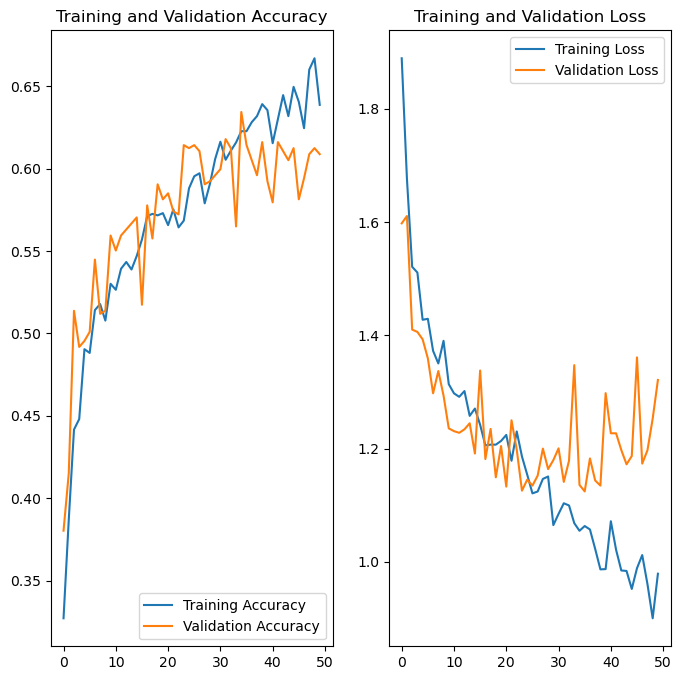

In [14]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
